In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
metadata=pd.read_csv("movies_metadata.csv",low_memory=False)

In [3]:
df=pd.DataFrame(metadata)

In [4]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [5]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df['revenue']=pd.to_numeric(df['revenue'], errors='coerce')
df['budget']=pd.to_numeric(df['budget'], errors='coerce')
df['popularity']=pd.to_numeric(df['popularity'], errors='coerce')
df['vote_average']=pd.to_numeric(df['vote_average'], errors='coerce')
df['vote_count']=pd.to_numeric(df['vote_count'], errors='coerce')
df['runtime']=pd.to_numeric(df['runtime'], errors='coerce')

In [8]:
df.drop(['belongs_to_collection','genres','homepage','imdb_id','poster_path','spoken_languages','overview','production_companies',
                  'production_countries','tagline','original_title','video','id'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

adult                  0
budget                 3
original_language     11
popularity             6
release_date          87
revenue                6
runtime              263
status                87
title                  6
vote_average           6
vote_count             6
dtype: int64

In [10]:
df['budget'].value_counts()[0]

36573

In [11]:
df['budget'] = df['budget'].replace(0, pd.NA)

In [12]:
df.isnull().sum()

adult                    0
budget               36576
original_language       11
popularity               6
release_date            87
revenue                  6
runtime                263
status                  87
title                    6
vote_average             6
vote_count               6
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df['budget']=df['budget'].astype(int)

In [15]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,8.873000e+03,8873.000000,8.873000e+03,8873.000000,8873.000000,8873.000000
mean,2.164265e+07,7.380553,5.477311e+07,105.407867,6.017987,467.636200
std,3.433220e+07,11.436547,1.366960e+08,28.274085,1.237195,1031.081136
min,1.000000e+00,0.000001,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000e+06,2.162690,0.000000e+00,91.000000,5.400000,20.000000
50%,8.138338e+06,6.335814,3.275585e+06,101.000000,6.200000,94.000000
75%,2.500000e+07,10.027137,4.490949e+07,116.000000,6.800000,408.000000
max,3.800000e+08,547.488298,2.787965e+09,705.000000,10.000000,14075.000000


<AxesSubplot:xlabel='budget'>

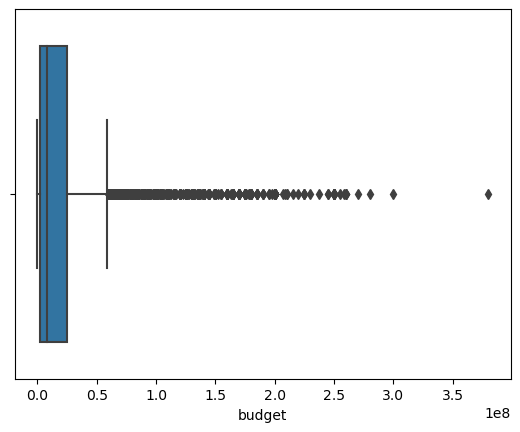

In [16]:
sns.boxplot(data=df,x=df['budget'])

In [17]:

df.drop(df[df['budget']>45000000].index,inplace=True)
df.drop(df[df['budget']<5500000].index,inplace=True)

<AxesSubplot:xlabel='popularity'>

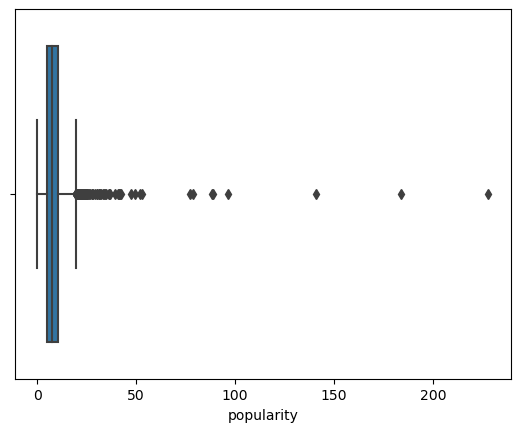

In [18]:
sns.boxplot(data=df,x=df['popularity'])

In [19]:

df.drop(df[df['popularity']<3].index,inplace=True)
df.drop(df[df['popularity']>30].index,inplace=True)


<AxesSubplot:xlabel='revenue'>

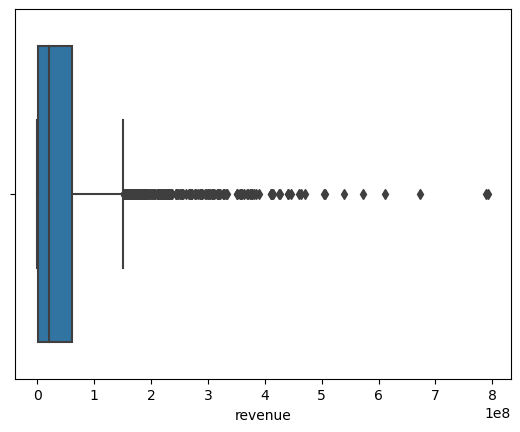

In [20]:
sns.boxplot(data=df,x=df['revenue'])

In [21]:

df.drop(df[df['revenue']<10000000].index,inplace=True)
df.drop(df[df['revenue']>90000000].index,inplace=True)


<AxesSubplot:xlabel='vote_average'>

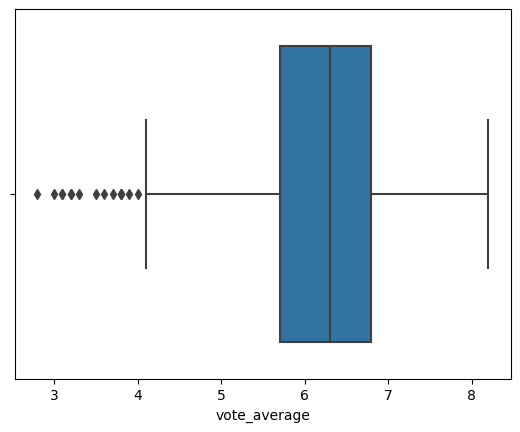

In [22]:
sns.boxplot(data=df,x=df['vote_average'])

In [23]:
df.drop(df[df['vote_average']<1].index,inplace=True)

In [24]:
df

,adult,budget,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
3,False,16000000,en,3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
8,False,35000000,en,5.231580,1995-12-22,64350171.0,106.0,Released,Sudden Death,5.5,174.0
13,False,44000000,en,5.092000,1995-12-22,13681765.0,192.0,Released,Nixon,7.1,72.0
26,False,12000000,en,8.681325,1995-10-20,27400000.0,100.0,Released,Now and Then,6.6,91.0
35,False,11000000,en,6.891317,1995-12-29,39363635.0,122.0,Released,Dead Man Walking,7.3,350.0
...,...,...,...,...,...,...,...,...,...,...,...
43232,False,12000000,en,10.159713,2017-04-20,17768012.0,100.0,Released,Unforgettable,5.7,117.0
43233,False,42000000,en,11.214779,2017-05-03,60845711.0,90.0,Released,Snatched,5.2,207.0
43691,False,20000000,en,24.317924,2017-06-15,45056771.0,101.0,Released,Rough Night,5.6,336.0
44282,False,21000000,en,20.214579,2017-08-04,24527158.0,95.0,Released,Kidnap,6.0,244.0


In [25]:
top_10_revenue = df.nlargest(10, 'revenue')
top_10_revenue

,adult,budget,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
1227,False,12000000,en,14.382289,1970-01-25,89800000.0,172.0,Released,Patton,7.3,327.0
1165,False,31500000,en,13.596300,1979-08-15,89460381.0,153.0,Released,Apocalypse Now,8.0,2112.0
16827,False,42000000,en,10.174298,2011-03-11,89162162.0,100.0,Released,Red Riding Hood,5.7,958.0
37702,False,18000000,en,6.344961,2016-03-23,88923251.0,94.0,Released,My Big Fat Greek Wedding 2,5.6,328.0
23877,False,22000000,en,14.466789,2014-08-06,88880821.0,122.0,Released,The Hundred-Foot Journey,7.3,516.0
3031,False,24000000,en,9.526781,1999-12-17,88545092.0,126.0,Released,The Cider House Rules,6.9,285.0
11670,False,11000000,ko,9.386916,2006-07-27,88489643.0,119.0,Released,The Host,6.7,546.0
33041,False,20000000,en,14.632390,2015-11-06,88346473.0,128.0,Released,Spotlight,7.8,2751.0
16463,False,40000000,en,13.471159,2011-01-07,88100000.0,95.0,Released,Season of the Witch,5.2,756.0
20052,False,35000000,en,11.418802,2012-12-20,88058786.0,134.0,Released,This Is 40,5.6,909.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

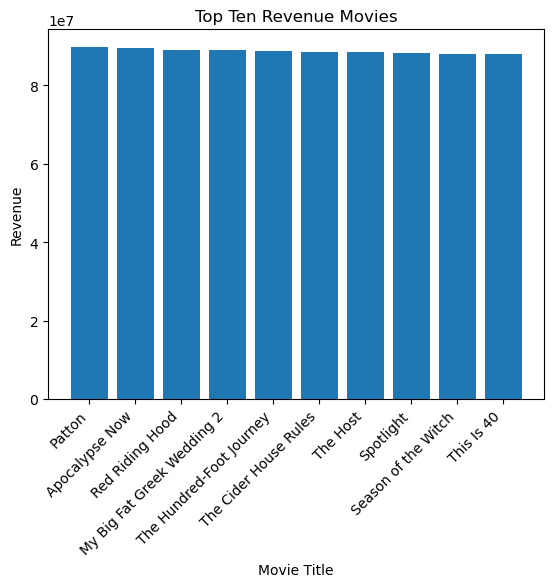

In [26]:
plt.bar(top_10_revenue['title'], top_10_revenue['revenue'])
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.title('Top Ten Revenue Movies')
plt.xticks(rotation=45, ha="right")

In [27]:
pop=df.nlargest(10,'popularity')

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

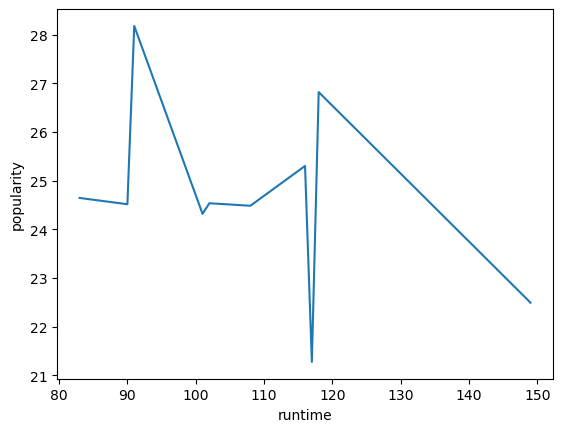

In [28]:
sns.lineplot(x=pop['runtime'],y=pop['popularity'])

In [29]:
bud = df.nsmallest(10, 'budget')
bud

,adult,budget,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
1848,False,5500000,en,6.877698,1981-05-15,58972904.0,123.0,Released,Chariots of Fire,6.9,213.0
2805,False,5500000,en,9.910870,1973-04-19,15700000.0,105.0,Released,High Plains Drifter,7.4,284.0
3610,False,5500000,en,11.844029,1978-03-10,24000000.0,118.0,Released,The Fury,6.2,73.0
4817,False,5500000,en,6.389326,1977-12-21,26414658.0,109.0,Released,The Gauntlet,6.6,121.0
6924,False,5500000,en,7.019730,1968-10-17,42300873.0,113.0,Released,Bullitt,7.0,273.0
20773,False,5500000,da,4.711231,2012-09-04,10016934.0,116.0,Released,Love Is All You Need,6.2,86.0
7241,False,5600000,en,5.191425,1965-06-03,29950000.0,138.0,Released,Those Magnificent Men in Their Flying Machines...,6.4,40.0
14884,False,5600000,es,8.853168,2009-09-15,18469680.0,85.0,Released,[REC]²,6.5,496.0
18574,False,5650000,de,5.244610,2011-02-02,43000000.0,123.0,Released,Kokowaah,6.4,103.0
14439,False,5700000,es,8.075698,2009-11-06,19300483.0,110.0,Released,Cell 211,7.3,288.0


<AxesSubplot:xlabel='budget', ylabel='revenue'>

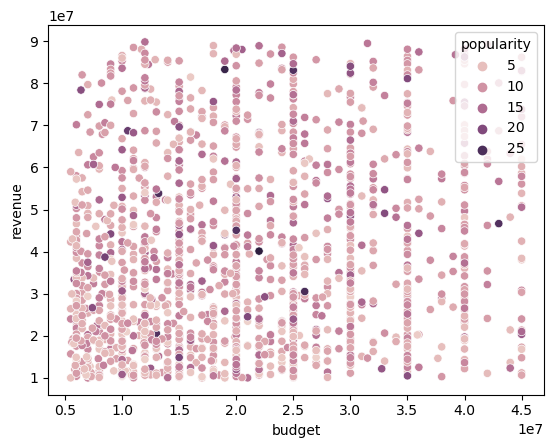

In [30]:
sns.scatterplot(x=df['budget'],y=df['revenue'],hue=df['popularity'])

In [31]:
pop1=df.nlargest(15,'popularity')

Text(0.5, 0, 'Movies')

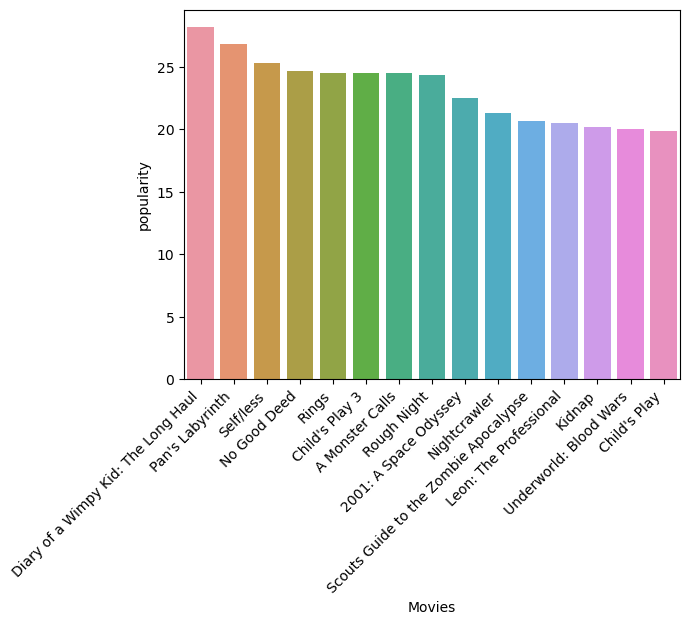

In [32]:
ax=sns.barplot(x=pop1['title'],y=pop1['popularity'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Movies')

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

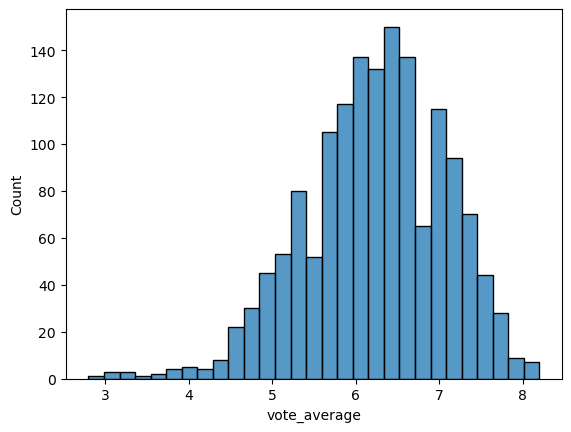

In [33]:
sns.histplot(data=df, x='vote_average')

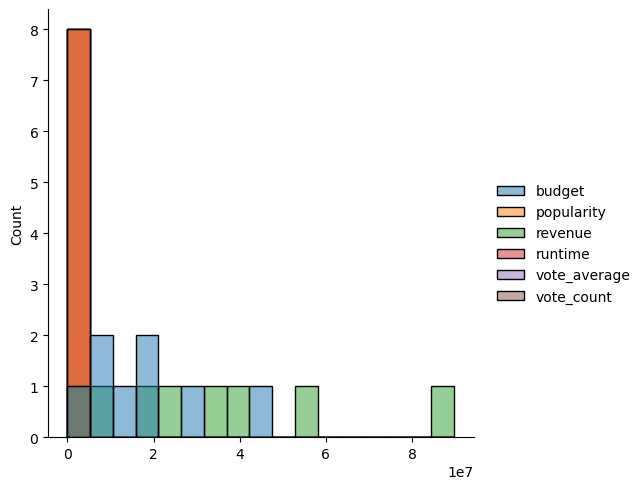

In [34]:
sns.displot(df.describe())

[Text(0, 0, 'Chariots of Fire'),
 Text(1, 0, 'High Plains Drifter'),
 Text(2, 0, 'The Fury'),
 Text(3, 0, 'The Gauntlet'),
 Text(4, 0, 'Bullitt'),
 Text(5, 0, 'Love Is All You Need'),
 Text(6, 0, 'Those Magnificent Men in Their Flying Machines or How I Flew from London to Paris in 25 hours 11 minutes'),
 Text(7, 0, '[REC]²'),
 Text(8, 0, 'Kokowaah'),
 Text(9, 0, 'Cell 211')]

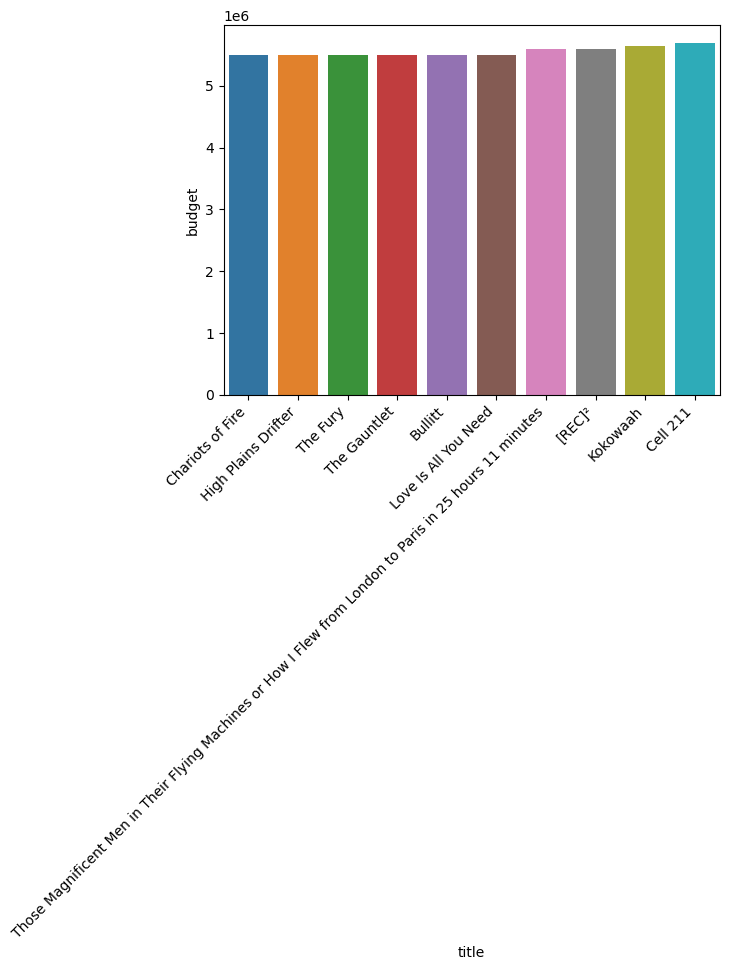

In [35]:

ax=sns.barplot(x=bud['title'],y=bud['budget'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


<AxesSubplot:xlabel='runtime', ylabel='revenue'>

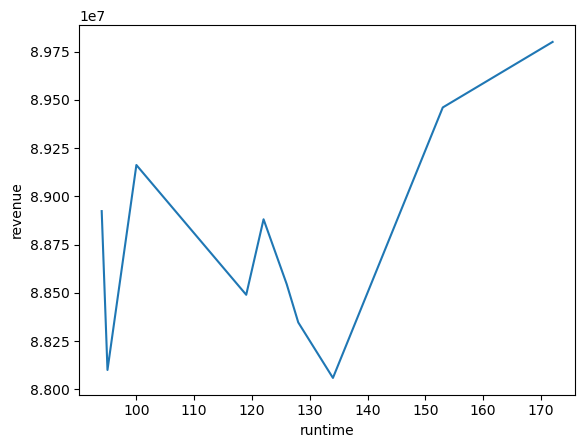

In [36]:
sns.lineplot(x=top_10_revenue['runtime'],y=top_10_revenue['revenue'])

<AxesSubplot:xlabel='vote_count', ylabel='Count'>

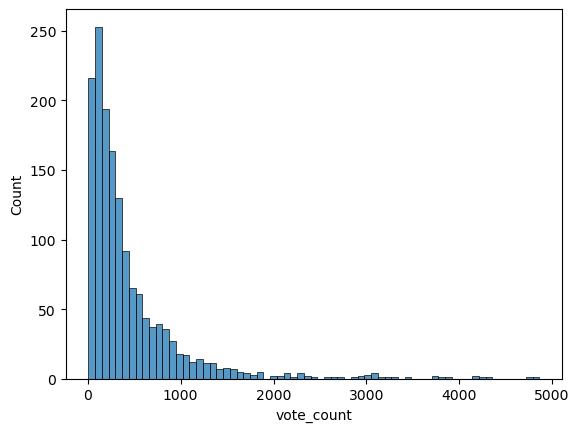

In [37]:
sns.histplot(data=df, x='vote_count')